In [2]:
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
import pandas as pd
import numpy as np
yeo = datasets.fetch_atlas_yeo_2011()
data = datasets.fetch_development_fmri(n_subjects=10)

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(kind='correlation')

# useful for plotting connectivity interactions on glass brain
from nilearn import plotting

# create masker to extract functional data within atlas parcels
masker = NiftiLabelsMasker(labels_img=yeo['thick_17'], standardize=True,
                           memory='nilearn_cache')

# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))


(168, 17)


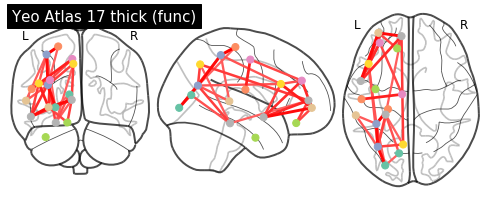

In [3]:
# calculate correlation matrices across subjects and display
print(time_series[0].shape)
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=yeo['thick_17'])

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="80%",
                         title='Yeo Atlas 17 thick (func)')


In [15]:
print(coordinates)

[[-26.08691104 -85.02461552  -1.78400214]
 [-11.44628099 -72.29265921  11.63924311]
 [-23.1343885  -25.87231899  62.18399215]
 [-51.01955636 -15.31800211  17.39336049]
 [-33.88532586 -65.32925142  21.65206863]
 [-35.34118839 -41.27366021  53.67946282]
 [ -8.29614292 -10.1999188   48.98400325]
 [-31.83510638  43.94603762  26.82338884]
 [-36.32529883  -4.7922206  -33.20359778]
 [-13.49154244  38.09376098 -17.81067108]
 [ -7.2        -62.99128329  43.90072639]
 [-43.51725647  21.92884832  23.30442666]
 [-33.26504844  54.47099162  -1.80178513]
 [-57.01045038 -32.26328209   5.17765642]
 [-25.68946598 -31.53365033 -18.04206291]
 [ -8.9324192   51.00526445   5.98261508]
 [-51.85504422   3.80310298 -11.67883376]]


In [28]:
coord = {}
coord['schaefer'] =pd.read_csv('coords/schaefer_coords.csv', sep=',',header=None).to_numpy()
coord['brainnetome'] =pd.read_csv('coords/brainnetome_coords.csv', sep=',',header=None).to_numpy()
coord['shen'] =pd.read_csv('coords/shen_coords.csv', sep=',',header=None).to_numpy()
coord['shen368'] =pd.read_csv('coords/shen_368_coords.csv', sep=',',header=None).to_numpy()
coord['power'] =pd.read_csv('coords/power_coords.txt', sep=',',header=None).to_numpy()
coord['dosenbach'] =pd.read_csv('coords/dosenbach_coords.txt', sep=',',header=None).to_numpy()
coord['craddock'] =pd.read_csv('coords/craddock_coords.txt', sep=',',header=None).to_numpy()
coord['craddock400'] =pd.read_csv('coords/craddock_400_coords.txt', sep=',',header=None).to_numpy()


In [5]:

print(c0.shape)

(246, 246)


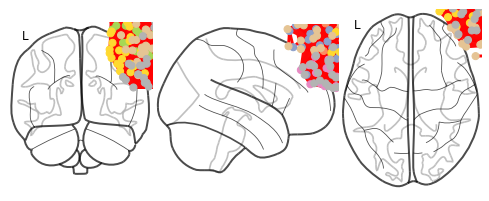

In [140]:
plotting.plot_connectome(c2, coord[target],
                         edge_threshold="80%")


In [5]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=yeo['thick_17'])


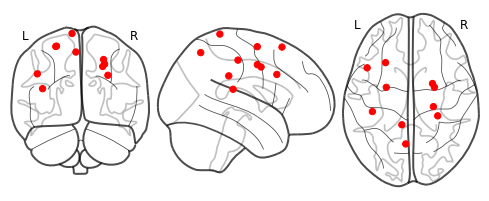

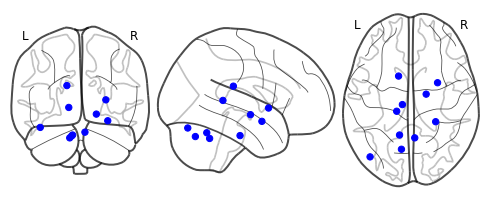

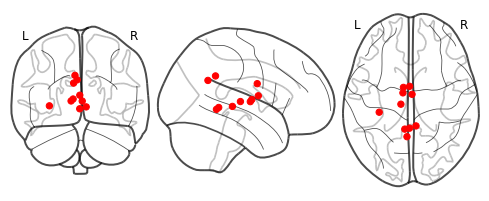

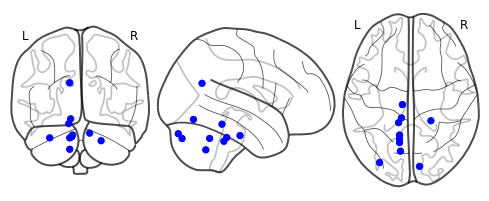

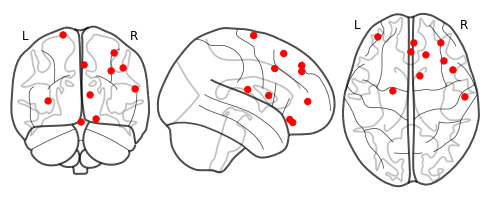

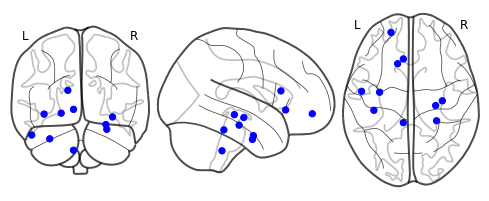

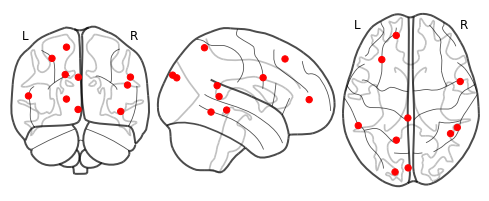

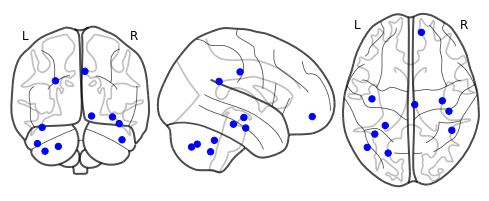

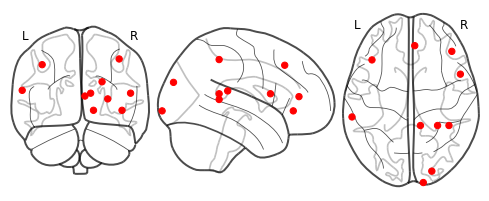

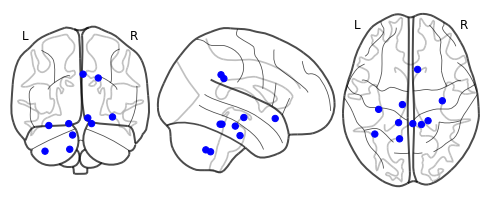

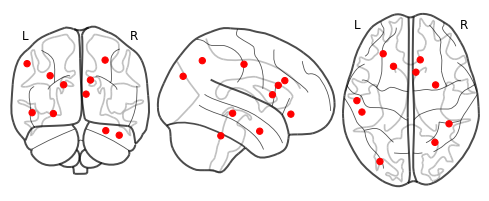

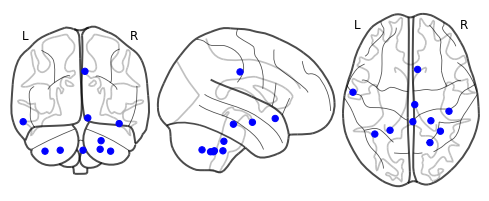

In [112]:
from nilearn import datasets, image
from matplotlib import pyplot as plt
# import cairo

def craddock(x,y,z):
    alpha=1.05
    return (x+5)/alpha,(y+5)/alpha,(z+5)/alpha

def craddock400(x,y,z):
    alpha=1.05
    return (x+5)/alpha,(y+5)/alpha,(z+5)/alpha

def shen(x,y,z):
    beta = 2
    return (x+5)/beta,(y+5)/beta,(z+5)/beta

def shen368(x,y,z):
    beta = 0.8
    mu = 0

    return (x+mu)/beta,(y+mu)/beta,(z+mu)/beta

def schaefer(x,y,z):
    beta =0.9
    mu = 1
    return (x+mu)/beta,(y+mu)/beta,(z+mu)/beta

def dosenbach(x,y,z):
    beta =0.95
    mu = 2
    return (x+mu)/beta,(y+mu)/beta,(z+mu)/beta

def power(x,y,z):
    beta =1
    mu = 2
    return (x+mu)/beta,(y+mu)/beta,(z+mu)/beta

def brainnetome(x,y,z):
    beta =0.75
    mu = -10
    return (x+mu)/beta,(y+mu)/beta,(z+mu)/beta

def node_threshold(c,atlas,k):
    G[G<0] = 0
    G[G>0.1]=1
    if atlas=='source':
        c = np.sum(G,1)
    else:
        c = np.sum(G,0)
#     c = np.sum(c,1)
    b= np.zeros((c.shape[0],))
    ind = np.argpartition(c, -k)[-k:]
    b[ind]=40#+c[ind]
    return b

atlas_list = ["schaefer","brainnetome","dosenbach","craddock","power","craddock400"]
# atlas_list = ["schaefer","craddock"]
# atlas_list = ["craddock400"]
for source in atlas_list:
#     source ="schaefer"
    target="shen"
    task = "rest1"
    p1=coord[source].shape[0]
    p2 = coord[target].shape[0]
    G = pd.read_csv('data/G_'+source+'_'+target+'_'+task+'_iq.csv', sep=',',usecols=[i for i in range(1,p2+1)]).to_numpy()
#     c1 = pd.read_csv('data/G_'+source+'_'+target+'_'+task+'_iq.csv', sep=',',usecols=[i for i in range(0,p2+1)]).to_numpy()
#     c2 = pd.read_csv('data/C2_'+source+'_'+target+'_'+'rest1_iq.csv', sep=',',usecols=[i for i in range(0,p2+1)]).to_numpy()

#     c2=c2[:,1:p2+1]

    # fig, (ax1, ax2,ax3) = plt.subplots(figsize=(10, 6), nrows=1, ncols=3)

    niimg = datasets.load_mni152_template()
    new_s_coords = []
    new_t_coords = []


    for x, y,z in coord[source]:
        if source=="craddock400":
            a,b,c = craddock400(x,y,z)
        if source=="shen368":
            a,b,c = shen368(x,y,z)
        if source=="brainnetome":
            a,b,c = brainnetome(x,y,z)
        if source=="power":
            a,b,c = power(x,y,z)
        if source=="dosenbach":
            a,b,c = dosenbach(x,y,z)
        if source=="craddock":
            a,b,c = craddock(x,y,z)
        if source=="schaefer":
            a,b,c = schaefer(x,y,z)

        new_s_coords.append(image.coord_transform(a,b,c, niimg.affine))

    for x, y,z in coord[target]:
        a,b,c = shen(x,y,z)
        new_t_coords.append(image.coord_transform(a,b,c, niimg.affine))

    new_s_coords = np.asarray(new_s_coords)
    new_t_coords = np.asarray(new_t_coords)

    # surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 100, 200)
    # context = cairo.Context(surface)
#     print(G.shape)
#     c0=c0[:,1:p1+1]
#     c1=c1[:,1:p2+1]
    
    c0 = node_threshold(G,'source',10)
    c1 = node_threshold(G,'target',10)

    plotting.plot_connectome(np.zeros((p1,p1)),new_s_coords,node_size=c0,node_color="red",edge_cmap='Greys')
#                               edge_threshold=0.8,output_file="surface_c0_"+source+"_"+target+"_"+task+".png")

    plotting.plot_connectome(np.zeros((p2,p2)),new_t_coords,node_size=c1,node_color="blue",edge_cmap='Greys')
#                               edge_threshold=0.8,output_file="surface_c1_"+source+"_"+target+"_"+task+".png")

#     plotting.plot_connectome(np.zeros((p2,p2)),new_t_coords,node_size=c2,node_color="olivedrab",edge_cmap='Reds')
#                              edge_threshold=0.94,output_file="surface_c2_"+source+"_"+target+"_"+task+".png")
# plt.savefig("surface_"+target+".pdf",format='pdf')